# Modules

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import joblib

# Load Dataset

In [5]:
amazon_dataset = pd.read_csv('Amazon.csv')
print(amazon_dataset.head())
print(amazon_dataset.describe())

   Unnamed: 0                                             review  polarity  \
0        3870                            able play youtube alexa    0.5000   
1          62  able recognize indian accent really well drop ...    0.2794   
2         487  absolute smart device amazon connect external ...    0.1827   
3        3204  absolutely amaze new member family control hom...    0.3682   
4        1265  absolutely amaze previously sceptical invest m...    0.2333   

   division  
0  positive  
1  positive  
2  positive  
3  positive  
4  positive  
        Unnamed: 0     polarity
count  4084.000000  4084.000000
mean   2070.871205     0.350653
std    1203.976943     0.367858
min       0.000000    -1.000000
25%    1024.750000     0.006725
50%    2061.500000     0.383300
75%    3119.250000     0.607100
max    4156.000000     1.000000


# Distribution of Polarity

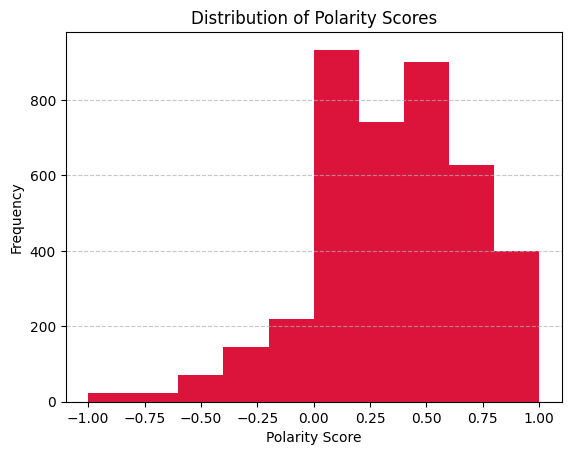

In [13]:
plt.hist(amazon_dataset['polarity'], color='crimson')
plt.xlabel("Polarity Score")
plt.ylabel('Frequency')
plt.title('Distribution of Polarity Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Sentiment Distribution

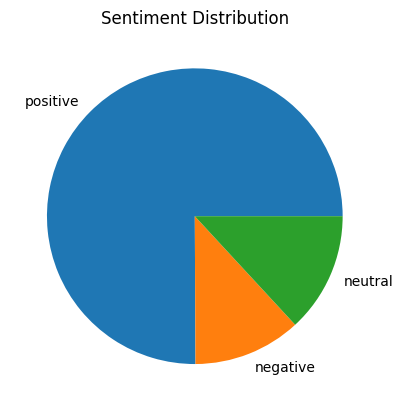

In [15]:
sentiments = ['positive', 'negative', 'neutral']
value_counts = []

for sentiment in sentiments:
    value_counts.append(amazon_dataset['division'].value_counts()[sentiment])

plt.pie(value_counts, labels=sentiments)
plt.title('Sentiment Distribution')
plt.show()

# Data Transformation - TF-IDF

In [16]:
vectorizer = TfidfVectorizer()
tfid = pd.DataFrame(vectorizer.fit_transform(amazon_dataset['review']).toarray())
amazon_dataset = pd.concat([amazon_dataset, tfid], axis=1)
amazon_dataset = amazon_dataset.drop(columns=['Unnamed: 0', 'polarity', 'review'])

# Save vectorizer

In [18]:
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']